# AJ CODE SECTION

In [ ]:
import pandas as pd
import datetime as dt

# MAROOF CODE SECTION 

In [ ]:
import pandas as pd
import datetime as dt

# AALIYAH CODE SECTION 

*delay or nonreceipt of needed medical care Data* https://www.cdc.gov/nchs/hus/data-finder.htm

In [ ]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt 

In [ ]:
health_age_data = pd.read_csv(r'Resources\Aaliyah Data\Health_Age_Data.csv')

health_age_data.head()

In [ ]:
#residence_location_data =

#residence_location_data.head()

In [ ]:
#residence_location_data.columns

In [ ]:
#residence_location_data = residence_location_data.set_index('Characteristic')

#residence_location_data

In [ ]:
#residence_within_msa = residence_location_data.loc['Within MSA']

#years = [col for col in residence_within_msa.index if not col.startswith('SE')]

#values = residence_within_msa[years].values

#plt.figure(figsize=(15,4))
#plt.plot(years, values, marker='o')
#plt.xlabel('Year')
#plt.ylabel('Value')
#plt.title('Data for Within MSA')
#plt.grid(True)
#plt.show()

# ALEXANDRA CODE SECTION 

In [83]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

This is working 

In [84]:
# Read the CSV file
df_2022 = pd.read_csv(r'Resources/Alexandra Data/Poverty_data_2022.csv')


df_2022.head()

,State,Total population,Number in poverty,Percent in poverty
0,Alabama,"4,990",681,13.6
1,Alaska,708,68,9.6
2,Arizona,"7,239",920,12.7
3,Arkansas,"2,993",496,16.6
4,California,"38,690","4,346",11.2


In [85]:
# List columns
df_2022.columns

Index(['State', 'Total population', 'Number in poverty ',
       'Percent in poverty'],
      dtype='object')

In [86]:
print(df_2022['Total population'].dtype)

object


In [87]:
print(df_2022.head().to_string())

        State Total population Number in poverty   Percent in poverty
0     Alabama            4,990                681                13.6
1      Alaska              708                 68                 9.6
2     Arizona            7,239                920                12.7
3    Arkansas            2,993                496                16.6
4  California           38,690              4,346                11.2


In [88]:
# Clean the data & data type conversion 
df_2022['Total population'] = df_2022['Total population'].replace(',', '', regex=True).astype(float).astype(int)
df_2022['Number in poverty '] = df_2022['Number in poverty '].replace(',', '', regex=True).astype(float).astype(int)
df_2022['Percent in poverty'] = df_2022['Percent in poverty'].astype(float)

# Set the index
df_2022.set_index('State', inplace=True)

# Display the first few rows of the cleaned dataset
print(df_2022.head().to_string())

            Total population  Number in poverty   Percent in poverty
State                                                               
Alabama                 4990                 681                13.6
Alaska                   708                  68                 9.6
Arizona                 7239                 920                12.7
Arkansas                2993                 496                16.6
California             38690                4346                11.2


In [89]:
#Add year to all colums 
df_rename_2022 = df_2022.rename(columns={
    'Total population': 'Total population (2022)',
    'Number in poverty ': 'Number in poverty (2022)',
    'Percent in poverty': 'Percent in poverty (2022)'
})

df_rename_2022.head()

,Total population (2022),Number in poverty (2022),Percent in poverty (2022)
State,,,
Alabama,4990,681,13.6
Alaska,708,68,9.6
Arizona,7239,920,12.7
Arkansas,2993,496,16.6
California,38690,4346,11.2


In [90]:
# Sort the DataFrame by 'Percent in poverty' in ascending order

df_sorted_2022 = df_rename_2022.sort_values('Percent in poverty (2022)')
df_sorted_2022

# Create a simple string table
table = "| State | Total population | Number in poverty | Percent in poverty |\n"
table += "|-------|-------------------------|--------------------------|---------------------|\n"
df_sorted_2022.head()


,Total population (2022),Number in poverty (2022),Percent in poverty (2022)
State,,,
Utah,3338,200,6.0
Wisconsin,5807,386,6.6
Wyoming,562,40,7.1
Minnesota,5626,427,7.6
Nebraska,1946,154,7.9


In [91]:
#assign the new colum names to the DataFrame 
df_sorted_2022.head()

,Total population (2022),Number in poverty (2022),Percent in poverty (2022)
State,,,
Utah,3338,200,6.0
Wisconsin,5807,386,6.6
Wyoming,562,40,7.1
Minnesota,5626,427,7.6
Nebraska,1946,154,7.9


##Here I will be grouping states by regions 

In [93]:
#define the regions and which states belong to each.
regions = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New York', 'New Jersey', 'Pennsylvania'],
    'Midwest': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'South': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
    'West': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
}

In [94]:
#Now, let's create a function to assign a region to each state:
def get_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return 'Other'  # for states not in the defined regions (e.g., District of Columbia)

In [105]:
#Add a new 'Region' column to your DataFrame:
df_rename_2022['Region'] = df_rename_2022.index.map(get_region)
df_rename_2022.head()

,Total population (2022),Number in poverty (2022),Percent in poverty (2022),Region
State,,,,
Alabama,4990,681,13.6,South
Alaska,708,68,9.6,West
Arizona,7239,920,12.7,West
Arkansas,2993,496,16.6,South
California,38690,4346,11.2,West


In [106]:
#Now you can group the data by region:
grouped_by_region_2022 = df_rename_2022.groupby(['Region', 'State']).mean()
grouped_by_region_2022.head()

Total population (2022)  Number in poverty (2022)  \
Region  State                                                         
Midwest Illinois                  12350.0                    1173.0   
        Indiana                    6792.0                     704.0   
        Iowa                       3183.0                     299.0   
        Kansas                     2846.0                     298.0   
        Michigan                   9961.0                    1206.0   

                  Percent in poverty (2022)  
Region  State                                
Midwest Illinois                        9.5  
        Indiana                        10.4  
        Iowa                            9.4  
        Kansas                         10.5  
        Michigan                       12.1

In [107]:
# Read the CSV file
df_2021 = pd.read_csv(r'Resources/Alexandra Data/Poverty_data_2021.csv')

df_2021.head()

,State,Total population,Number in poverty,Percent in poverty
0,Alabama,"4,961",787,15.9
1,Alaska,712,81,11.4
2,Arizona,"7,303",922,12.6
3,Arkansas,"2,981",502,16.8
4,California,"38,770","4,615",11.9


In [108]:
# List columns
df_2021.columns

Index(['State', 'Total population', 'Number in poverty', 'Percent in poverty'], dtype='object')

In [109]:
#Check index type
print(df_2021['Total population'].dtype)
print(df_2021['Number in poverty'].dtype)
print(df_2021['Percent in poverty'].dtype)

object
object
float64


In [110]:
print(df_2021.head().to_string())

        State Total population Number in poverty  Percent in poverty
0     Alabama            4,961               787                15.9
1      Alaska              712                81                11.4
2     Arizona            7,303               922                12.6
3    Arkansas            2,981               502                16.8
4  California           38,770             4,615                11.9


In [111]:
# Clean the data & data type conversion 
df_2021['Total population'] = df_2021['Total population'].replace(',', '', regex=True).astype(float).astype(int)
df_2021['Number in poverty'] = df_2021['Number in poverty'].replace(',', '', regex=True).astype(float).astype(int)
df_2021['Percent in poverty'] = df_2021['Percent in poverty'].astype(float)

# Set the index
df_2021.set_index('State', inplace=True)

# Display the first few rows of the cleaned dataset
print(df_2021.head().to_string())

            Total population  Number in poverty  Percent in poverty
State                                                              
Alabama                 4961                787                15.9
Alaska                   712                 81                11.4
Arizona                 7303                922                12.6
Arkansas                2981                502                16.8
California             38770               4615                11.9


In [112]:
#Add year to all colums 
df_rename_2021 = df_2021.rename(columns={
    'Total population': 'Total population (2021)',
    'Number in poverty': 'Number in poverty (2021)',
    'Percent in poverty': 'Percent in poverty (2021)'
})

df_rename_2021.head()

,Total population (2021),Number in poverty (2021),Percent in poverty (2021)
State,,,
Alabama,4961,787,15.9
Alaska,712,81,11.4
Arizona,7303,922,12.6
Arkansas,2981,502,16.8
California,38770,4615,11.9


In [113]:
# Sort the DataFrame by 'Percent in poverty' in ascending order

df_sorted_2021 = df_rename_2021.sort_values('Percent in poverty (2021)')
df_sorted_2021

# Create a simple string table
table = "| State | Total population | Number in poverty | Percent in poverty |\n"
table += "|-------|-------------------------|--------------------------|---------------------|\n"
df_sorted_2021.head()

,Total population (2021),Number in poverty (2021),Percent in poverty (2021)
State,,,
Minnesota,5532,382,6.9
New Hampshire,1390,96,6.9
Kansas,2891,206,7.1
Vermont,631,47,7.5
New Jersey,9220,698,7.6


In [ ]:
#Grouping states by Region here 

In [115]:
#define the regions and which states belong to each.
regions = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New York', 'New Jersey', 'Pennsylvania'],
    'Midwest': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'South': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
    'West': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
}

In [116]:
#Now, let's create a function to assign a region to each state:
def get_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return 'Other'  # for states not in the defined regions (e.g., District of Columbia)

In [117]:
#Add a new 'Region' column to your DataFrame:
df_rename_2021['Region'] = df_rename_2021.index.map(get_region)
df_rename_2021.head()

,Total population (2021),Number in poverty (2021),Percent in poverty (2021),Region
State,,,,
Alabama,4961,787,15.9,South
Alaska,712,81,11.4,West
Arizona,7303,922,12.6,West
Arkansas,2981,502,16.8,South
California,38770,4615,11.9,West


In [132]:
#Now you can group the data by region:
grouped_by_region_2021 = df_rename_2021.groupby(['Region', 'State']).mean()
grouped_by_region_2021.head()

Total population (2021)  Number in poverty (2021)  \
Region  State                                                         
Midwest Illinois                  12460.0                    1339.0   
        Indiana                    6778.0                     704.0   
        Iowa                       3182.0                     309.0   
        Kansas                     2891.0                     206.0   
        Michigan                   9842.0                    1147.0   

                  Percent in poverty (2021)  
Region  State                                
Midwest Illinois                       10.7  
        Indiana                        10.4  
        Iowa                            9.7  
        Kansas                          7.1  
        Michigan                       11.7

In [119]:
# Read the CSV file
df_2020 = pd.read_csv(r'Resources/Alexandra Data/Poverty_data_2020.csv')

df_2020.head()

,State,Total population,Number in poverty,Percent in poverty
0,Alabama,"5,001",744,14.9
1,Alaska,708,95,13.4
2,Arizona,"7,203",783,10.9
3,Arkansas,"2,974",420,14.1
4,California,"39,200","4,332",11.1


In [120]:
# List columns
df_2020.columns

Index(['State', 'Total population', 'Number in poverty', 'Percent in poverty'], dtype='object')

In [121]:
#Check index type
print(df_2020['Total population'].dtype)
print(df_2020['Number in poverty'].dtype)
print(df_2020['Percent in poverty'].dtype)

object
object
float64


In [122]:
print(df_2020.head().to_string())

        State Total population Number in poverty  Percent in poverty
0     Alabama            5,001               744                14.9
1      Alaska              708                95                13.4
2     Arizona            7,203               783                10.9
3    Arkansas            2,974               420                14.1
4  California           39,200             4,332                11.1


In [123]:
# Clean the data & data type conversion 
df_2020['Total population'] = df_2020['Total population'].replace(',', '', regex=True).astype(float).astype(int)
df_2020['Number in poverty'] = df_2020['Number in poverty'].replace(',', '', regex=True).astype(float).astype(int)
df_2020['Percent in poverty'] = df_2020['Percent in poverty'].astype(float)

# Set the index
df_2020.set_index('State', inplace=True)

# Display the first few rows of the cleaned dataset
print(df_2020.head().to_string())

            Total population  Number in poverty  Percent in poverty
State                                                              
Alabama                 5001                744                14.9
Alaska                   708                 95                13.4
Arizona                 7203                783                10.9
Arkansas                2974                420                14.1
California             39200               4332                11.1


In [124]:
#Add year to all colums 
df_rename_2020 = df_2020.rename(columns={
    'Total population': 'Total population (2020)',
    'Number in poverty': 'Number in poverty (2020)',
    'Percent in poverty': 'Percent in poverty (2020)'
})

df_rename_2020.head()

,Total population (2020),Number in poverty (2020),Percent in poverty (2020)
State,,,
Alabama,5001,744,14.9
Alaska,708,95,13.4
Arizona,7203,783,10.9
Arkansas,2974,420,14.1
California,39200,4332,11.1


In [125]:
# Sort the DataFrame by 'Percent in poverty' in ascending order

df_sorted_2020 = df_rename_2020.sort_values('Percent in poverty (2020)')
df_sorted_2020

# Create a simple string table
table = "| State | Total population | Number in poverty | Percent in poverty |\n"
table += "|-------|-------------------------|--------------------------|---------------------|\n"
df_sorted_2020.head()

,Total population (2020),Number in poverty (2020),Percent in poverty (2020)
State,,,
New Hampshire,1387,87,6.2
Utah,3272,242,7.4
Virginia,8501,663,7.8
Maine,1366,109,8.0
Wisconsin,5836,466,8.0


#Grouping states by regions 

In [127]:
regions = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New York', 'New Jersey', 'Pennsylvania'],
    'Midwest': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'South': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
    'West': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
}

In [129]:
#Now, let's create a function to assign a region to each state:
def get_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return 'Other'  # for states not in the defined regions (e.g., District of Columbia)

In [130]:
#Add a new "Region" column to your DataFrame 
df_rename_2020['Region'] = df_2020.index.map(get_region)

In [131]:
#Now you can group the data by region:
grouped_by_region_2020 = df_rename_2020.groupby(['Region', 'State']).mean()
grouped_by_region_2020.head()

Total population (2020)  Number in poverty (2020)  \
Region  State                                                         
Midwest Illinois                  12640.0                    1010.0   
        Indiana                    6685.0                     807.0   
        Iowa                       3163.0                     290.0   
        Kansas                     2891.0                     267.0   
        Michigan                   9891.0                    1112.0   

                  Percent in poverty (2020)  
Region  State                                
Midwest Illinois                        8.0  
        Indiana                        12.1  
        Iowa                            9.2  
        Kansas                          9.3  
        Michigan                       11.2

In [183]:
Regions_2020 = grouped_by_region_2020['Percent in poverty (2020)']
Regions_2020

Region     State               
Midwest    Illinois                 8.0
           Indiana                 12.1
           Iowa                     9.2
           Kansas                   9.3
           Michigan                11.2
           Minnesota                8.5
           Missouri                10.7
           Nebraska                 8.3
           North Dakota            10.7
           Ohio                    12.7
           South Dakota            11.6
           Wisconsin                8.0
Northeast  Connecticut             11.2
           Maine                    8.0
           Massachusetts            8.4
           New Hampshire            6.2
           New Jersey               8.2
           New York                11.8
           Pennsylvania            10.7
           Rhode Island             8.5
           Vermont                  8.6
Other      District of Columbia    16.8
South      Alabama                 14.9
           Arkansas                14.1
        

#2019 DATA 

In [133]:
# Read the CSV file
df_2019 = pd.read_csv(r'Resources/Alexandra Data/Poverty_data_2019.csv')

df_2019.head()

,State,Total population,Number in poverty,Percent in poverty
0,Alabama,"4,873",627,12.9
1,Alaska,701,72,10.2
2,Arizona,"7,285",725,9.9
3,Arkansas,"2,915",412,14.1
4,California,"39,380","3,980",10.1


In [134]:
# List columns
df_2019.columns

Index(['State', 'Total population', 'Number in poverty', 'Percent in poverty'], dtype='object')

In [135]:
#Check index type
print(df_2019['Total population'].dtype)
print(df_2019['Number in poverty'].dtype)
print(df_2019['Percent in poverty'].dtype)

object
object
float64


In [136]:
print(df_2019.head().to_string())

        State Total population Number in poverty  Percent in poverty
0     Alabama            4,873               627                12.9
1      Alaska              701                72                10.2
2     Arizona            7,285               725                 9.9
3    Arkansas            2,915               412                14.1
4  California           39,380             3,980                10.1


In [137]:
# Clean the data & data type conversion 
df_2019['Total population'] = df_2019['Total population'].replace(',', '', regex=True).astype(float).astype(int)
df_2019['Number in poverty'] = df_2019['Number in poverty'].replace(',', '', regex=True).astype(float).astype(int)
df_2019['Percent in poverty'] = df_2019['Percent in poverty'].astype(float)

# Set the index
df_2019.set_index('State', inplace=True)

# Display the first few rows of the cleaned dataset
print(df_2019.head().to_string())

            Total population  Number in poverty  Percent in poverty
State                                                              
Alabama                 4873                627                12.9
Alaska                   701                 72                10.2
Arizona                 7285                725                 9.9
Arkansas                2915                412                14.1
California             39380               3980                10.1


In [209]:
#Add year to all colums 
df_rename_2019 = df_2019.rename(columns={
    'Total population': 'Total population (2019)',
    'Number in poverty': 'Number in poverty (2019)',
    'Percent in poverty': '2019'
})


df_rename_2019.head()

,Total population (2019),Number in poverty (2019),2019
State,,,
Alabama,4873,627,12.9
Alaska,701,72,10.2
Arizona,7285,725,9.9
Arkansas,2915,412,14.1
California,39380,3980,10.1


In [211]:
# Sort the DataFrame by 'Percent in poverty' in ascending order

df_sorted_2019 = df_rename_2019.sort_values('2019')
df_sorted_2019

# Create a simple string table
table = "| State | Total population | Number in poverty | Percent in poverty |\n"
table += "|-------|-------------------------|--------------------------|---------------------|\n"
df_sorted_2019.head()

,Total population (2019),Number in poverty (2019),2019
State,,,
New Hampshire,1351,49,3.7
Minnesota,5681,322,5.7
New Jersey,8738,554,6.3
Delaware,971,63,6.5
Washington,7549,527,7.0


#Group by regions section 2019

In [213]:
#Add a new "Region" column to your DataFrame 
df_rename_2019['Region'] = df_2019.index.map(get_region)


In [232]:
#Now you can group the data by region:
grouped_by_region_2019 = df_rename_2019.groupby(['Region', 'State']).mean()
grouped_by_region_2019.head()

Total population (2019)  Number in poverty (2019)  2019
Region  State                                                            
Midwest Illinois                  12500.0                    1160.0   9.3
        Indiana                    6691.0                     677.0  10.1
        Iowa                       3137.0                     298.0   9.5
        Kansas                     2813.0                     266.0   9.5
        Michigan                   9901.0                    1007.0  10.2

In [343]:
####Merged Data for all years 

Regions_combined= pd.merge(grouped_by_region_2019,grouped_by_region_2018, on=['State', 'Region'])
Regions_adding_2017= pd.merge(Regions_combined,grouped_by_region_2017, on=['State', 'Region'])
Regions_adding_2016= pd.merge(Regions_adding_2017,grouped_by_region_2016, on=['State', 'Region'])
Regions_adding_2015= pd.merge(Regions_adding_2016,grouped_by_region_2015, on=['State', 'Region'])

Regions_adding_2015




,,Total population (2019),Number in poverty (2019),2019,Total population (2018),Number in poverty (2018),2018,Total population (2017),Number in poverty (2017),2017,Total population (2016),Number in poverty (2016),2016,Total population (2015),Number in poverty (2015),2015
State,Region,,,,,,,,,,,,,,,
Illinois,Midwest,12500.0,1160.0,9.3,12590.0,1292.0,10.3,12600.0,1379.0,10.9,12580.0,1517.0,12.1,12680.0,1380.0,10.9
Indiana,Midwest,6691.0,677.0,10.1,6582.0,761.0,11.6,6533.0,748.0,11.4,6493.0,768.0,11.8,6502.0,880.0,13.5
Iowa,Midwest,3137.0,298.0,9.5,3110.0,277.0,8.9,3054.0,278.0,9.1,3099.0,302.0,9.8,3100.0,321.0,10.4
Kansas,Midwest,2813.0,266.0,9.5,2835.0,212.0,7.5,2870.0,421.0,14.7,2859.0,321.0,11.2,2849.0,404.0,14.2
Michigan,Midwest,9901.0,1007.0,10.2,9913.0,1036.0,10.5,9889.0,1259.0,12.7,9875.0,1091.0,11.1,9852.0,1259.0,12.8
Minnesota,Midwest,5681.0,322.0,5.7,5746.0,456.0,7.9,5619.0,519.0,9.2,5430.0,470.0,8.7,5458.0,428.0,7.8
Missouri,Midwest,6063.0,568.0,9.4,6026.0,745.0,12.4,5979.0,666.0,11.1,5878.0,762.0,13.0,5946.0,582.0,9.8
Nebraska,Midwest,1885.0,165.0,8.7,1893.0,199.0,10.5,1875.0,194.0,10.4,1870.0,179.0,9.6,1858.0,192.0,10.3
North Dakota,Midwest,749.0,61.0,8.1,745.0,72.0,9.7,742.0,84.0,11.3,749.0,83.0,11.1,763.0,82.0,10.7


In [313]:
Regions_grouped = Regions_combined.groupby('Region').mean()
Regions_grouped

,Total population (2019),Number in poverty (2019),2019,Total population (2018),Number in poverty (2018),2018
Region,,,,,,
Midwest,5626.666667,543.166667,9.325000,5628.166667,583.666667,10.033333
Northeast,6122.000000,575.333333,8.355556,6140.888889,631.333333,9.588889
Other,702.000000,88.000000,12.500000,692.000000,102.000000,14.700000
South,7715.187500,922.375000,12.518750,7673.312500,1040.875000,13.800000
West,5999.230769,572.692308,9.384615,5967.461538,669.230769,10.938462


In [220]:
Region_pivot_2019 = pd.pivot_table(Regions_grouped,values='2019', columns='Region', aggfunc='mean')
Region_pivot_2019

Region,Midwest,Northeast,Other,South,West
2019,9.325,8.355556,12.5,12.51875,9.384615


In [ ]:
#2018 DATA

In [155]:
# Read the CSV file
df_2018 = pd.read_csv(r'Resources/Alexandra Data/Poverty_data_2018.csv')

df_2018.head()

,State,Total population,Number in poverty,Percent in poverty
0,Alabama,"4,877",779,16.0
1,Alaska,720,94,13.1
2,Arizona,"7,241",929,12.8
3,Arkansas,"2,912",462,15.9
4,California,"39,150","4,664",11.9


In [156]:
# List columns
df_2018.columns

Index(['State', 'Total population ', 'Number in poverty',
       'Percent in poverty'],
      dtype='object')

In [163]:
#Check index type
print(df_2018['Total population '].dtype)
print(df_2018['Number in poverty'].dtype)
print(df_2018['Percent in poverty'].dtype)

object
object
float64


In [165]:
# Clean the data & data type conversion 
df_2018['Total population '] = df_2018['Total population '].replace(',', '', regex=True).astype(float).astype(int)
df_2018['Number in poverty'] = df_2018['Number in poverty'].replace(',', '', regex=True).astype(float).astype(int)
df_2018['Percent in poverty'] = df_2018['Percent in poverty'].astype(float)

# Set the index
df_2018.set_index('State', inplace=True)

# Display the first few rows of the cleaned dataset
print(df_2018.head().to_string())


            Total population   Number in poverty  Percent in poverty
State                                                               
Alabama                  4877                779                16.0
Alaska                    720                 94                13.1
Arizona                  7241                929                12.8
Arkansas                 2912                462                15.9
California              39150               4664                11.9


In [236]:
#Add year to all colums AND rename Percent in poverty to just year 
df_rename_2018 = df_2018.rename(columns={
    'Total population ': 'Total population (2018)',
    'Number in poverty': 'Number in poverty (2018)',
    'Percent in poverty': '2018'
})


df_rename_2018.head()

,Total population (2018),Number in poverty (2018),2018
State,,,
Alabama,4877,779,16.0
Alaska,720,94,13.1
Arizona,7241,929,12.8
Arkansas,2912,462,15.9
California,39150,4664,11.9


In [ ]:
#Group states by regions 2018 

In [238]:
#Add a new "Region" column to your DataFrame 
df_rename_2018['Region'] = df_2018.index.map(get_region)

In [239]:
#Now you can group the data by region:
grouped_by_region_2018 = df_rename_2018.groupby(['Region', 'State']).mean()
grouped_by_region_2018.head()

Total population (2018)  Number in poverty (2018)  2018
Region  State                                                            
Midwest Illinois                  12590.0                    1292.0  10.3
        Indiana                    6582.0                     761.0  11.6
        Iowa                       3110.0                     277.0   8.9
        Kansas                     2835.0                     212.0   7.5
        Michigan                   9913.0                    1036.0  10.5

In [245]:
Region_pivot_2018 = pd.pivot_table(Regions_grouped,values='2018', columns='Region', aggfunc='mean')
Region_pivot_2018

Region,Midwest,Northeast,Other,South,West
2018,10.033333,9.588889,14.7,13.8,10.938462


In [ ]:
#2017 DATASET 

In [172]:
# Read the CSV file
df_2017 = pd.read_csv(r'Resources/Alexandra Data/Poverty_data_2017.csv')

df_2017.head()

,State,Total population,Number in poverty,Percent in poverty
0,Alabama,"4,806",723,15.0
1,Alaska,717,103,14.4
2,Arizona,"6,990",926,13.2
3,Arkansas,"2,924",432,14.8
4,California,"39,240","4,872",12.4


In [227]:
#Check index type
print(df_2017['Total population'].dtype)
print(df_2017['Number in poverty'].dtype)
print(df_2017['Percent in poverty'].dtype)

object
object
float64


In [229]:
# Clean the data & data type conversion 
df_2017['Total population'] = df_2017['Total population'].replace(',', '', regex=True).astype(float).astype(int)
df_2017['Number in poverty'] = df_2017['Number in poverty'].replace(',', '', regex=True).astype(float).astype(int)
df_2017['Percent in poverty'] = df_2017['Percent in poverty'].astype(float)

# Set the index
df_2017.set_index('State', inplace=True)

# Display the first few rows of the cleaned dataset
print(df_2017.head().to_string())


            Total population  Number in poverty  Percent in poverty
State                                                              
Alabama                 4806                723                15.0
Alaska                   717                103                14.4
Arizona                 6990                926                13.2
Arkansas                2924                432                14.8
California             39240               4872                12.4


In [272]:
#Add year to all colums rename Percent in Poverty to '2019'
df_rename_2017 = df_2017.rename(columns={
    'Total population': 'Total population (2017)',
    'Number in poverty': 'Number in poverty (2017)',
    'Percent in poverty': '2017'
})


df_rename_2017.head()

,Total population (2017),Number in poverty (2017),2017
State,,,
Alabama,4806,723,15.0
Alaska,717,103,14.4
Arizona,6990,926,13.2
Arkansas,2924,432,14.8
California,39240,4872,12.4


In [ ]:
#GROUP STATES BY REGIONS 

In [306]:
#Add a new "Region" column to your DataFrame 
df_rename_2017['Region'] = df_2017.index.map(get_region)

In [307]:
#Now you can group the data by region:
grouped_by_region_2017 = df_rename_2017.groupby(['Region', 'State']).mean()
grouped_by_region_2017.head()

Total population (2017)  Number in poverty (2017)  2017
Region  State                                                            
Midwest Illinois                  12600.0                    1379.0  10.9
        Indiana                    6533.0                     748.0  11.4
        Iowa                       3054.0                     278.0   9.1
        Kansas                     2870.0                     421.0  14.7
        Michigan                   9889.0                    1259.0  12.7

In [314]:
#Combine years 

Regions_grouped = Regions_adding_2017.groupby('Region').mean()
Regions_grouped

,Total population (2019),Number in poverty (2019),2019,Total population (2018),Number in poverty (2018),2018,Total population (2017),Number in poverty (2017),2017
Region,,,,,,,,,
Midwest,5626.666667,543.166667,9.325000,5628.166667,583.666667,10.033333,5611.666667,637.333333,11.116667
Northeast,6122.000000,575.333333,8.355556,6140.888889,631.333333,9.588889,6218.555556,708.222222,10.633333
Other,702.000000,88.000000,12.500000,692.000000,102.000000,14.700000,692.000000,94.000000,13.600000
South,7715.187500,922.375000,12.518750,7673.312500,1040.875000,13.800000,7597.375000,1032.250000,13.943750
West,5999.230769,572.692308,9.384615,5967.461538,669.230769,10.938462,5922.000000,697.615385,11.753846


In [315]:
#Create piviot table for 2017

Region_pivot_2017 = pd.pivot_table(Regions_grouped,values='2017', columns='Region', aggfunc='mean')
Region_pivot_2017

Region,Midwest,Northeast,Other,South,West
2017,11.116667,10.633333,13.6,13.94375,11.753846


In [ ]:
#2016 Data

In [317]:
# Read the CSV file
df_2016 = pd.read_csv(r'Resources/Alexandra Data/Poverty_data_2016.csv')

df_2016.head()

,State,Total population,Number in poverty,Percent in poverty
0,Alabama,"4,821",782,16.2
1,Alaska,708,89,12.6
2,Arizona,"6,878","1,108",16.1
3,Arkansas,"2,941",471,16.0
4,California,"39,140","5,435",13.9


In [318]:
#Check index type
print(df_2016['Total population'].dtype)
print(df_2016['Number in poverty'].dtype)
print(df_2016['Percent in poverty'].dtype)

object
object
float64


In [319]:
# Clean the data & data type conversion 
df_2016['Total population'] = df_2016['Total population'].replace(',', '', regex=True).astype(float).astype(int)
df_2016['Number in poverty'] = df_2016['Number in poverty'].replace(',', '', regex=True).astype(float).astype(int)
df_2016['Percent in poverty'] = df_2016['Percent in poverty'].astype(float)

# Set the index
df_2016.set_index('State', inplace=True)

# Display the first few rows of the cleaned dataset
print(df_2016.head().to_string())

            Total population  Number in poverty  Percent in poverty
State                                                              
Alabama                 4821                782                16.2
Alaska                   708                 89                12.6
Arizona                 6878               1108                16.1
Arkansas                2941                471                16.0
California             39140               5435                13.9


In [322]:
#Add year to all colums rename Percent in Poverty to '2016'
df_rename_2016 = df_2016.rename(columns={
    'Total population': 'Total population (2016)',
    'Number in poverty': 'Number in poverty (2016)',
    'Percent in poverty': '2016'
})


df_rename_2016.head()

,Total population (2016),Number in poverty (2016),2016
State,,,
Alabama,4821,782,16.2
Alaska,708,89,12.6
Arizona,6878,1108,16.1
Arkansas,2941,471,16.0
California,39140,5435,13.9


In [ ]:
#Group states by regions 

In [323]:
#Add a new "Region" column to your DataFrame 
df_rename_2016['Region'] = df_2016.index.map(get_region)

In [324]:
#Now you can group the data by region:
grouped_by_region_2016 = df_rename_2016.groupby(['Region', 'State']).mean()
grouped_by_region_2016.head()

Total population (2016)  Number in poverty (2016)  2016
Region  State                                                            
Midwest Illinois                  12580.0                    1517.0  12.1
        Indiana                    6493.0                     768.0  11.8
        Iowa                       3099.0                     302.0   9.8
        Kansas                     2859.0                     321.0  11.2
        Michigan                   9875.0                    1091.0  11.1

In [334]:
#Combine years 

Regions_grouped = Regions_adding_2016.groupby('Region').mean()
Regions_grouped

,Total population (2019),Number in poverty (2019),2019,Total population (2018),Number in poverty (2018),2018,Total population (2017),Number in poverty (2017),2017,Total population (2016),Number in poverty (2016),2016
Region,,,,,,,,,,,,
Midwest,5626.666667,543.166667,9.325000,5628.166667,583.666667,10.033333,5611.666667,637.333333,11.116667,5574.333333,650.833333,11.441667
Northeast,6122.000000,575.333333,8.355556,6140.888889,631.333333,9.588889,6218.555556,708.222222,10.633333,6163.888889,663.111111,10.211111
Other,702.000000,88.000000,12.500000,692.000000,102.000000,14.700000,692.000000,94.000000,13.600000,685.000000,112.000000,16.300000
South,7715.187500,922.375000,12.518750,7673.312500,1040.875000,13.800000,7597.375000,1032.250000,13.943750,7530.000000,1057.312500,14.762500
West,5999.230769,572.692308,9.384615,5967.461538,669.230769,10.938462,5922.000000,697.615385,11.753846,5875.000000,754.615385,11.800000


In [335]:
#Create piviot table for 2016

Region_pivot_2016 = pd.pivot_table(Regions_grouped,values='2016', columns='Region', aggfunc='mean')
Region_pivot_2016

Region,Midwest,Northeast,Other,South,West
2016,11.441667,10.211111,16.3,14.7625,11.8


In [ ]:
#2015 data 

In [336]:
# Read the CSV file
df_2015 = pd.read_csv(r'Resources/Alexandra Data/Poverty_data_2015.csv')

df_2015.head()

,State,Total population,Number in poverty,Percent in poverty
0,Alabama,"4,820",784,16.3
1,Alaska,703,65,9.2
2,Arizona,"6,728","1,156",17.2
3,Arkansas,"2,951",475,16.1
4,California,"39,080","5,441",13.9


In [337]:
#Check index type
print(df_2015['Total population'].dtype)
print(df_2015['Number in poverty'].dtype)
print(df_2015['Percent in poverty'].dtype)

object
object
float64


In [338]:
# Clean the data & data type conversion 
df_2015['Total population'] = df_2015['Total population'].replace(',', '', regex=True).astype(float).astype(int)
df_2015['Number in poverty'] = df_2015['Number in poverty'].replace(',', '', regex=True).astype(float).astype(int)
df_2015['Percent in poverty'] = df_2015['Percent in poverty'].astype(float)

# Set the index
df_2015.set_index('State', inplace=True)

# Display the first few rows of the cleaned dataset
print(df_2015.head().to_string())

            Total population  Number in poverty  Percent in poverty
State                                                              
Alabama                 4820                784                16.3
Alaska                   703                 65                 9.2
Arizona                 6728               1156                17.2
Arkansas                2951                475                16.1
California             39080               5441                13.9


In [339]:
#Add year to all colums rename Percent in Poverty to '2015'
df_rename_2015 = df_2015.rename(columns={
    'Total population': 'Total population (2015)',
    'Number in poverty': 'Number in poverty (2015)',
    'Percent in poverty': '2015'
})


df_rename_2015.head()

,Total population (2015),Number in poverty (2015),2015
State,,,
Alabama,4820,784,16.3
Alaska,703,65,9.2
Arizona,6728,1156,17.2
Arkansas,2951,475,16.1
California,39080,5441,13.9


In [ ]:
#Group states by regions 

In [340]:
#Add a new "Region" column to your DataFrame 
df_rename_2015['Region'] = df_2015.index.map(get_region)

In [341]:
#Now you can group the data by region:
grouped_by_region_2015 = df_rename_2015.groupby(['Region', 'State']).mean()
grouped_by_region_2015.head()

Total population (2015)  Number in poverty (2015)  2015
Region  State                                                            
Midwest Illinois                  12680.0                    1380.0  10.9
        Indiana                    6502.0                     880.0  13.5
        Iowa                       3100.0                     321.0  10.4
        Kansas                     2849.0                     404.0  14.2
        Michigan                   9852.0                    1259.0  12.8

In [344]:
#Combine years 

Regions_grouped = Regions_adding_2015.groupby('Region').mean()
Regions_grouped

,Total population (2019),Number in poverty (2019),2019,Total population (2018),Number in poverty (2018),2018,Total population (2017),Number in poverty (2017),2017,Total population (2016),Number in poverty (2016),2016,Total population (2015),Number in poverty (2015),2015
Region,,,,,,,,,,,,,,,
Midwest,5626.666667,543.166667,9.325000,5628.166667,583.666667,10.033333,5611.666667,637.333333,11.116667,5574.333333,650.833333,11.441667,5586.000000,654.166667,11.608333
Northeast,6122.000000,575.333333,8.355556,6140.888889,631.333333,9.588889,6218.555556,708.222222,10.633333,6163.888889,663.111111,10.211111,6197.888889,765.555556,11.155556
Other,702.000000,88.000000,12.500000,692.000000,102.000000,14.700000,692.000000,94.000000,13.600000,685.000000,112.000000,16.300000,676.000000,113.000000,16.600000
South,7715.187500,922.375000,12.518750,7673.312500,1040.875000,13.800000,7597.375000,1032.250000,13.943750,7530.000000,1057.312500,14.762500,7455.125000,1137.000000,15.200000
West,5999.230769,572.692308,9.384615,5967.461538,669.230769,10.938462,5922.000000,697.615385,11.753846,5875.000000,754.615385,11.800000,5822.153846,775.307692,12.338462


In [345]:
#Create piviot table for 2015

Region_pivot_2015 = pd.pivot_table(Regions_grouped,values='2015', columns='Region', aggfunc='mean')
Region_pivot_2015

Region,Midwest,Northeast,Other,South,West
2015,11.608333,11.155556,16.6,15.2,12.338462


In [347]:
Region_pivot_total= pd.concat([Region_pivot_2019,Region_pivot_2018,Region_pivot_2017,Region_pivot_2016,Region_pivot_2015])
Region_pivot_total

Region,Midwest,Northeast,Other,South,West
2019,9.325000,8.355556,12.5,12.51875,9.384615
2018,10.033333,9.588889,14.7,13.80000,10.938462
2017,11.116667,10.633333,13.6,13.94375,11.753846
2016,11.441667,10.211111,16.3,14.76250,11.800000
2015,11.608333,11.155556,16.6,15.20000,12.338462


In [348]:
Region_pivot_reset= Region_pivot_total.reset_index()
Region_pivot_set_index= Region_pivot_reset.set_index('index')
Region_pivot_final= Region_pivot_set_index.rename_axis('Year')
Region_pivot_final

Region,Midwest,Northeast,Other,South,West
Year,,,,,
2019,9.325000,8.355556,12.5,12.51875,9.384615
2018,10.033333,9.588889,14.7,13.80000,10.938462
2017,11.116667,10.633333,13.6,13.94375,11.753846
2016,11.441667,10.211111,16.3,14.76250,11.800000
2015,11.608333,11.155556,16.6,15.20000,12.338462


<function matplotlib.pyplot.show(close=None, block=None)>

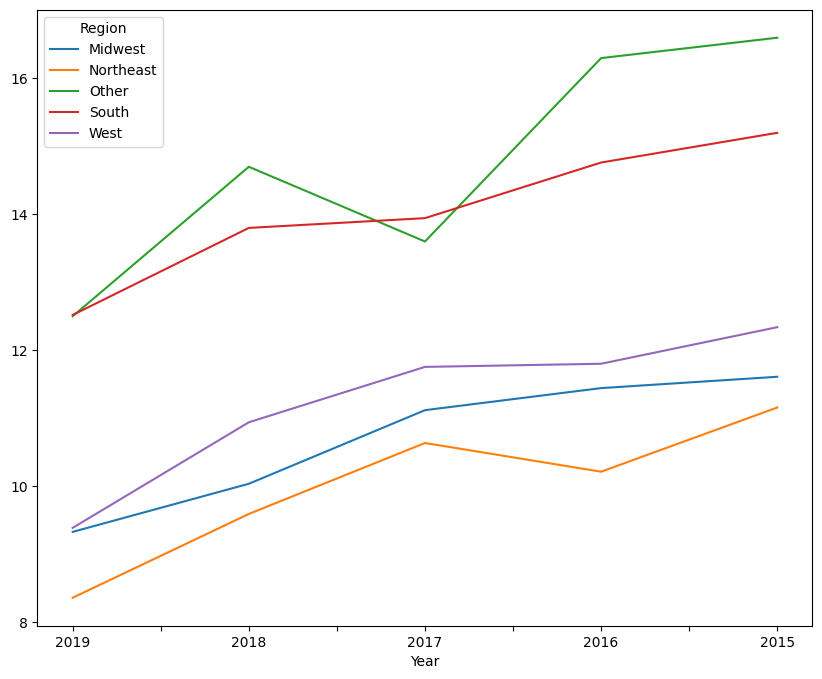

In [349]:
Region_pivot_final.plot(figsize=(10,8))
plt.show